ToDo:
Write one script where all the necessary preprocessing steps are done:
0) Read in files
1) Remove all low expressed genes from the gtex data
2) remove all genes that are not in the tcga data??? and vice versa???
3) remove duplicated genes from the gtex data

Double check if thing with the low expressed genes is right

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
breast_tpm_tcga = pd.read_csv("/nfs/data/patients_networks/DysRegNet_workflow/results/expression_processed/BRCA/tpm_untransformed.csv")
breast_tpm_gtex = pd.read_csv("/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_breast_mammary_tissue.gct", sep = "\t", skiprows=2) 

In [34]:
breast_tpm_gtex

,Name,Description,GTEX-1117F-2826-SM-5GZXL,GTEX-111YS-1926-SM-5GICC,GTEX-1122O-1226-SM-5H113,GTEX-117XS-1926-SM-5GICO,GTEX-117YX-1426-SM-5H12H,GTEX-1192X-2326-SM-5987X,GTEX-11DXW-0626-SM-5N9ER,GTEX-11DXY-2326-SM-5GICW,...,GTEX-ZVZQ-0826-SM-51MRF,GTEX-ZWKS-2826-SM-5NQ74,GTEX-ZXES-0826-SM-5E43C,GTEX-ZY6K-1626-SM-5GZWV,GTEX-ZYFC-0826-SM-5E44K,GTEX-ZYT6-0126-SM-5E45J,GTEX-ZYW4-0826-SM-5GIDG,GTEX-ZYY3-2526-SM-GMXAZ,GTEX-ZZ64-1226-SM-5E43R,GTEX-ZZPU-0626-SM-5E43T
0,ENSG00000223972.5,DDX11L1,0.00000,0.024292,0.000000,0.016586,0.00000,0.000000,0.00000,0.021657,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.013098,0.000000,0.044779
1,ENSG00000227232.5,WASH7P,9.70327,3.984990,3.216660,5.031390,1.54279,5.747010,4.12534,3.158000,...,4.843430,6.52637,4.565930,7.93565,8.12971,3.789410,2.476760,3.700440,2.396020,2.069660
2,ENSG00000278267.1,MIR6859-1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000243485.5,MIR1302-2HG,0.00000,0.000000,0.000000,0.000000,0.00000,0.047638,0.00000,0.000000,...,0.047308,0.00000,0.046679,0.00000,0.00000,0.040923,0.059345,0.000000,0.000000,0.044701
4,ENSG00000237613.2,FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.033608,0.00000,0.000000,0.00000,0.00000,0.029072,0.000000,0.018578,0.056745,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59028,ENSG00000198695.2,MT-ND6,1756.72000,16237.400000,18616.100000,3714.490000,10884.30000,3135.010000,4216.49000,3527.590000,...,2682.240000,1909.59000,9018.270000,4246.55000,1975.01000,1901.690000,1721.120000,2116.390000,12679.100000,7573.060000
59029,ENSG00000210194.1,MT-TE,2.08274,46.870200,74.173900,11.637000,21.59500,8.968300,12.09370,7.597510,...,7.124980,2.20367,24.605800,17.14340,6.40094,1.540820,2.234460,8.205090,47.117100,23.563500
59030,ENSG00000198727.2,MT-CYB,20157.30000,28117.200000,28111.500000,37297.500000,28662.50000,21129.200000,40547.30000,39393.000000,...,30909.400000,24611.30000,17613.500000,16762.40000,32463.80000,37696.400000,22142.600000,14745.600000,37514.900000,18348.400000
59031,ENSG00000210195.2,MT-TT,0.00000,5.727350,1.221190,0.868993,1.41104,0.625064,2.19886,0.567347,...,1.241470,0.00000,2.449920,1.62934,1.48709,0.536954,0.778677,0.000000,1.048060,0.000000


In [35]:
filtered_df = breast_tpm_gtex[~(breast_tpm_gtex['Description'].str.startswith('ENS'))]

In [36]:
filtered_df.shape

(39911, 516)

In [20]:
breast_tpm_gtex['Description'].nunique()


57853

In [5]:
string = 'test'
print(string.startswith('t'))

True


In [10]:
print('number of genes before removing duplicates ' + str(breast_tpm_gtex.shape[0]))
duplicated_names = breast_tpm_gtex['Description'].duplicated(keep=False)
print(f'{duplicated_names.sum()} genes names occured multiple times in the Description column')
breast_tpm_gtex_no_dupl = breast_tpm_gtex[~duplicated_names]
print('number of genes left after removing duplicates ' + str(breast_tpm_gtex_no_dupl.shape[0]))

number of genes before removing duplicates 59033
1276 genes names occured multiple times in the Description column
number of genes left after removing duplicates 57757


In [13]:
#filter out all non expressed genes from the non duplicated df
# Step 1: Count samples with expression below the threshold for each gene
non_expressed_counts = (breast_tpm_gtex_no_dupl == 0).sum(axis=1)

# Step 2: Calculate the proportion of non-expressed samples per gene
non_expressed_proportion = non_expressed_counts / breast_tpm_gtex_no_dupl.shape[1]

# Step 3: Identify genes with ≥80% of samples not expressed
low_expression_genes = breast_tpm_gtex_no_dupl.index[non_expressed_proportion >= 0.2]

#remove those genes
breast_tpm_gtex_filtered = breast_tpm_gtex_no_dupl.drop(low_expression_genes, axis=0)

# Output the list of genes
print('number of genes before removing the not expressed: ' + str(breast_tpm_gtex_no_dupl.shape[0]))
print(f"Number of genes not expressed in ≥80% of samples: {len(low_expression_genes)}")
print('number of genes after removing the not expressed: ' + str(breast_tpm_gtex_filtered.shape[0]))


number of genes before removing the not expressed: 57757
Number of genes not expressed in ≥80% of samples: 32397
number of genes after removing the not expressed: 25360


In [18]:
breast_tpm_gtex_filtered


,Name,Description,GTEX-1117F-2826-SM-5GZXL,GTEX-111YS-1926-SM-5GICC,GTEX-1122O-1226-SM-5H113,GTEX-117XS-1926-SM-5GICO,GTEX-117YX-1426-SM-5H12H,GTEX-1192X-2326-SM-5987X,GTEX-11DXW-0626-SM-5N9ER,GTEX-11DXY-2326-SM-5GICW,...,GTEX-ZVZQ-0826-SM-51MRF,GTEX-ZWKS-2826-SM-5NQ74,GTEX-ZXES-0826-SM-5E43C,GTEX-ZY6K-1626-SM-5GZWV,GTEX-ZYFC-0826-SM-5E44K,GTEX-ZYT6-0126-SM-5E45J,GTEX-ZYW4-0826-SM-5GIDG,GTEX-ZYY3-2526-SM-GMXAZ,GTEX-ZZ64-1226-SM-5E43R,GTEX-ZZPU-0626-SM-5E43T
1,ENSG00000227232.5,WASH7P,9.703270,3.984990,3.216660,5.031390,1.542790,5.747010,4.125340,3.158000,...,4.843430,6.52637,4.565930,7.935650,8.129710,3.789410,2.476760,3.70044,2.396020,2.069660
7,ENSG00000186092.7,OR4F5,0.018298,0.080215,0.046179,0.087630,0.053359,0.078790,0.097008,0.042909,...,0.046946,0.01936,0.061763,0.123227,0.037490,0.054147,0.039261,0.02595,0.092476,0.088720
8,ENSG00000238009.6,ENSG00000238009,0.000000,0.040837,0.000000,0.097587,0.022637,0.100278,0.000000,0.145629,...,0.000000,0.00000,0.000000,0.287530,0.071571,0.172285,0.024984,0.15413,0.016814,0.037639
10,ENSG00000268903.1,ENSG00000268903,2.093780,9.123300,6.138290,3.456410,3.885500,8.797250,2.114400,0.644746,...,6.565830,3.82650,9.423280,7.192820,1.624960,1.642870,7.147330,12.41780,0.274855,11.382700
11,ENSG00000269981.1,ENSG00000269981,4.048150,19.669300,8.939620,8.986740,9.017730,11.766200,2.427260,0.922937,...,9.520880,3.74779,13.806700,10.223500,1.382360,2.121350,9.952810,17.06430,0.730689,21.945500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59027,ENSG00000198786.2,MT-ND5,2929.780000,11130.400000,12135.900000,5316.420000,7501.450000,3312.770000,5148.400000,4817.930000,...,3588.820000,3236.69000,6566.540000,3309.200000,3180.410000,2554.600000,3179.620000,2486.48000,10345.600000,5941.320000
59028,ENSG00000198695.2,MT-ND6,1756.720000,16237.400000,18616.100000,3714.490000,10884.300000,3135.010000,4216.490000,3527.590000,...,2682.240000,1909.59000,9018.270000,4246.550000,1975.010000,1901.690000,1721.120000,2116.39000,12679.100000,7573.060000
59029,ENSG00000210194.1,MT-TE,2.082740,46.870200,74.173900,11.637000,21.595000,8.968300,12.093700,7.597510,...,7.124980,2.20367,24.605800,17.143400,6.400940,1.540820,2.234460,8.20509,47.117100,23.563500
59030,ENSG00000198727.2,MT-CYB,20157.300000,28117.200000,28111.500000,37297.500000,28662.500000,21129.200000,40547.300000,39393.000000,...,30909.400000,24611.30000,17613.500000,16762.400000,32463.800000,37696.400000,22142.600000,14745.60000,37514.900000,18348.400000


In [5]:
print("shape of tcga data: " + str(breast_tpm_tcga.shape))
print("shape of gtex data: " + str(breast_tpm_gtex.shape))


shape of tcga data: (22671, 1212)
shape of gtex data: (59033, 516)


In [6]:
gene_descriptions_gtex = set(breast_tpm_gtex['Description'])
gene_descriptions_tcga = set(breast_tpm_tcga['sample'])


In [7]:
#check how many of the tcga gene names are in the gtex descriptions
difference = gene_descriptions_gtex - gene_descriptions_tcga
difference2 = gene_descriptions_tcga - gene_descriptions_gtex
count_diff = len (difference)
count_diff2 = len(difference2)
percent = len(difference2)/len(gene_descriptions_tcga)
intersect = gene_descriptions_gtex & gene_descriptions_tcga
count_intersect = len(intersect)
print(f"{count_diff} genes are in the gtex, but not in the tcga data")
print(f"{count_diff2} are in the tcga but not the gtex data, thats {percent} of the tcga genes")
print(f"{count_intersect} genes are in both datasets")

40583 genes are in the gtex, but not in the tcga data
5401 are in the tcga but not the gtex data, thats 0.23823386705482774 of the tcga genes
17270 genes are in both datasets


In [8]:
unmatched_tcga = []
for gene in gene_descriptions_tcga:
    if gene not in gene_descriptions_gtex:
        unmatched_tcga.append(gene)
print(unmatched_tcga)

unmatched_gtex = []
for gene in gene_descriptions_gtex:
    if gene not in gene_descriptions_tcga:
        unmatched_gtex.append(gene)
print(unmatched_gtex)

['CTD-3216D2.5', 'CTD-2026K11.6', 'RP11-1212A22.4', 'CTD-2396E7.11', 'RP11-371I20.2', 'RP1-172N19.5', 'RP11-534L20.4', 'FLJ44511', 'RTFDC1', 'RP11-24F11.2', 'CTB-31O20.2', 'CTC-564N23.2', 'RP11-360F5.3', 'RP11-863P13.4', 'AC139100.4', 'LL22NC03-2H8.5', 'CTB-158D10.3', 'MRVI1', 'RP11-155G14.5', 'AL450992.2', 'RP11-326I11.3', 'AC012360.6', 'RP11-19P22.8', 'RP11-467L13.7', 'KB-1125A3.12', 'C9orf147', 'METTL20', 'CTC-251I16.1', 'C20orf24', 'LLNLR-470E3.1', 'RP11-775D22.2', 'RP11-467P9.1', 'RP11-554J4.1', 'LA16c-360H6.1', 'HIST1H1C', 'RP11-1348G14.4', 'CTD-2382E5.6', 'CTB-113P19.4', 'RP11-624G17.3', 'RP11-613D13.5', 'MINOS1', 'RP11-438L19.1', 'AC012314.8', 'RP11-138C9.1', 'RP11-631M6.2', 'AES', 'RP11-262H14.3', 'RP11-324L17.1', 'RP11-274H2.5', 'RP11-426J5.3', 'AC141928.1', 'RP11-1379J22.2', 'RP11-350G13.1', 'RP11-218M22.1', 'AC108463.2', 'RP4-781K5.2', 'AC012065.1', 'AC013271.3', 'ASUN', 'CTD-2306A12.1', 'RP3-512B11.3', 'AC113189.5', 'RP11-456K23.1', 'KIAA0355', 'CTC-246B18.8', 'HIST1H3PS1'

In [10]:
print('ENSG00000279235' in gene_descriptions_gtex)

True


In [19]:
print(gene_descriptions_tcga)

{'PCBD2', 'NDUFB6', 'CTD-3216D2.5', 'COL9A2', 'CDK14', 'NUDT19', 'CTD-2026K11.6', 'TSPAN18', 'RP11-1212A22.4', 'PHLDB2', 'RAP1B', 'MGP', 'CDC5L', 'CTD-2396E7.11', 'TRPV4', 'MAST4-AS1', 'MKNK1', 'RP11-371I20.2', 'NUP188', 'GZMH', 'SIT1', 'SUMO1', 'OMA1', 'RP1-172N19.5', 'TPM3P9', 'LIMK2', 'RP11-534L20.4', 'DUSP9', 'IFNG', 'FLJ44511', 'KIF11', 'RTFDC1', 'TNFSF18', 'RP11-24F11.2', 'EXOSC5', 'CYB5D1', 'CAMK2N2', 'PRCD', 'VPS54', 'EXD3', 'ENTPD5', 'LCN2', 'TUT1', 'TIMM50', 'CTB-31O20.2', 'CATIP', 'CPA3', 'KIF9', 'FRMD8', 'ZCCHC12', 'CMAS', 'PKIG', 'ZNHIT1', 'SPP1', 'NR2C2AP', 'SLC51B', 'ZFX', 'RAB3IL1', 'CTC-564N23.2', 'RP11-360F5.3', 'MRPL35P2', 'GRIK3', 'PAMR1', 'RP11-863P13.4', 'TAS2R14', 'ARGLU1', 'AC139100.4', 'DSTNP1', 'LL22NC03-2H8.5', 'CTB-158D10.3', 'DACT1', 'ZC3H12A', 'ADAMTS3', 'CD40', 'IVNS1ABP', 'MRVI1', 'KMO', 'RPS20P22', 'SEMA3D', 'HOXC13-AS', 'INPP5D', 'ASTE1', 'RP11-155G14.5', 'ZNF580', 'AL450992.2', 'HIF3A', 'AFAP1', 'ATF6B', 'PIWIL2', 'BHMT2', 'FAM193A', 'BTN2A1', 'DNAJC1

In [9]:
matched_tcga_df = breast_tpm_tcga[breast_tpm_tcga['sample'].isin(gene_descriptions_gtex)]
matched_gtex_data = breast_tpm_gtex[breast_tpm_gtex['Description'].isin(gene_descriptions_tcga)]
unique = set(matched_gtex_data['Description'])
matched_gtex_data[matched_gtex_data['Description'].duplicated(keep=False)]

,Name,Description,GTEX-1117F-2826-SM-5GZXL,GTEX-111YS-1926-SM-5GICC,GTEX-1122O-1226-SM-5H113,GTEX-117XS-1926-SM-5GICO,GTEX-117YX-1426-SM-5H12H,GTEX-1192X-2326-SM-5987X,GTEX-11DXW-0626-SM-5N9ER,GTEX-11DXY-2326-SM-5GICW,...,GTEX-ZVZQ-0826-SM-51MRF,GTEX-ZWKS-2826-SM-5NQ74,GTEX-ZXES-0826-SM-5E43C,GTEX-ZY6K-1626-SM-5GZWV,GTEX-ZYFC-0826-SM-5E44K,GTEX-ZYT6-0126-SM-5E45J,GTEX-ZYW4-0826-SM-5GIDG,GTEX-ZYY3-2526-SM-GMXAZ,GTEX-ZZ64-1226-SM-5E43R,GTEX-ZZPU-0626-SM-5E43T
5051,ENSG00000285053.1,TBCE,0.338538,0.000000,0.284800,0.000000,0.000000,0.000000,0.128202,0.264628,...,0.289531,0.000000,0.142840,0.189993,0.346812,0.250452,0.181600,0.080021,0.000000,0.000000
5055,ENSG00000284770.2,TBCE,0.793300,1.087910,0.872722,0.913273,0.533858,0.893403,1.663850,0.636007,...,0.678461,0.473484,1.064230,0.707775,0.958556,0.767468,0.960203,0.721211,0.293724,1.002720
18071,ENSG00000182230.12,FAM153B,0.094194,0.045882,0.184899,0.025062,0.020347,0.045067,0.000000,0.000000,...,0.017902,0.000000,0.070655,0.023495,0.000000,0.007743,0.044914,0.019791,0.015113,0.025373
18072,ENSG00000251623.2,FAM153B,0.061699,0.302941,0.851246,0.066484,0.095959,0.021254,0.056076,0.028937,...,0.116088,0.156675,0.312394,0.013851,0.164338,0.063903,0.185342,0.472522,0.053456,0.139608
25000,ENSG00000253161.6,LINC01605,0.477837,0.209479,0.100497,0.226458,0.174181,0.102878,0.527781,0.015563,...,0.630025,0.379185,0.168012,0.648078,0.387533,0.279859,0.854409,0.367080,0.057500,0.209164
25002,ENSG00000253414.3,LINC01605,0.516476,1.584930,0.977609,0.618367,0.941327,1.056380,2.640410,0.302789,...,2.815900,0.614770,0.381356,2.173910,2.645490,0.620898,1.662300,1.556530,0.745789,1.982520
30132,ENSG00000236756.4,DNAJC9-AS1,0.471952,0.862081,0.512839,0.800501,0.191151,1.033050,0.848943,0.461144,...,0.504540,0.624191,1.460300,0.441446,1.067700,0.552824,0.189874,0.818083,0.312353,0.619764
30134,ENSG00000227540.1,DNAJC9-AS1,3.286780,4.046770,2.117920,2.679290,1.835380,3.372610,3.760530,3.443840,...,4.306190,2.811690,4.898060,2.825770,2.865630,4.087120,3.151080,3.405170,1.817660,4.408010
41313,ENSG00000188626.7,GOLGA8M,5.645350,3.193380,1.488240,6.099780,3.026170,2.561580,1.957240,7.300530,...,5.080290,10.001100,1.126950,0.856552,5.934350,7.153230,3.284150,1.742320,3.982020,2.011260
41315,ENSG00000261480.1,GOLGA8M,1.285210,1.434170,0.393163,0.769377,0.681429,0.201240,0.088491,0.730632,...,0.000000,0.494481,0.394378,0.131142,0.239385,0.432182,0.000000,0.000000,0.674848,0.377672


In [42]:
matched_gtex_data[matched_gtex_data['Description'].duplicated(keep=False)].iloc[0,3] == 0

True

In [29]:
#plot median expression in both datasets
# Step 1: Calculate median expression per gene
tcga_median_expression = breast_tpm_tcga.iloc[:, 1:].median(axis=1)  # Mean for each gene across samples
gtex_median_expression = breast_tpm_gtex.iloc[:, 2:].median(axis=1)


In [27]:
tcga_median_expression

0           0.709989
1           0.430012
2           0.549991
3           7.680031
4           4.550052
            ...     
22666    4863.906240
22667    6963.513955
22668    1584.815401
22669    2674.770620
22670    4591.658672
Length: 22671, dtype: float64

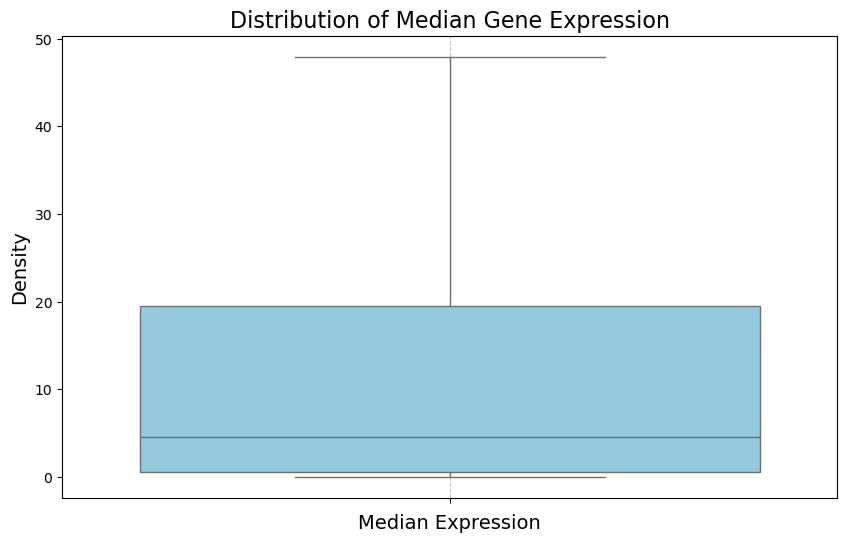

In [38]:
# Step 2: Create a box plot of the median expression values
plt.figure(figsize=(10, 6))
sns.boxplot(y=tcga_median_expression, color='skyblue',showfliers=False)

# Step 3: Customize the plot
plt.title("Distribution of Median Gene Expression", fontsize=16)
plt.xlabel("Median Expression", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#check if there are any low expressed genes in the gtex data
#check if non-zero and zero add up to the total number of samples


# Assuming `expression_matrix` is your gene expression DataFrame
# Rows are genes, columns are samples
# Threshold for "not expressed" (e.g., 0 or 0.1)


# Step 1: Count samples with expression below the threshold for each gene
non_expressed_counts = (matched_gtex_data == 0).sum(axis=1)

# Step 2: Calculate the proportion of non-expressed samples per gene
non_expressed_proportion = non_expressed_counts / matched_gtex_data.shape[1]

# Step 3: Identify genes with ≥80% of samples not expressed
low_expression_genes = matched_gtex_data.index[non_expressed_proportion >= 0.2]

# Output the list of genes
print(f"Number of genes not expressed in ≥80% of samples: {len(low_expression_genes)}")
print("Genes:", low_expression_genes.tolist())
print(non_expressed_counts)


Number of genes not expressed in ≥80% of samples: 588
Genes: [9, 233, 270, 302, 323, 543, 554, 562, 569, 580, 631, 704, 724, 749, 874, 887, 1347, 1565, 1628, 1660, 1820, 2440, 2446, 2597, 2686, 2808, 2811, 2822, 2838, 2898, 2910, 2973, 3118, 3384, 3455, 3458, 3459, 3975, 4017, 4047, 4270, 4328, 4379, 4415, 4464, 4487, 4543, 4807, 4855, 5051, 5144, 5159, 5451, 5634, 6039, 6301, 6383, 6523, 6552, 6560, 6584, 6594, 6638, 6645, 6853, 6903, 6905, 6914, 6918, 6921, 6946, 6952, 6956, 6957, 6965, 6970, 6971, 6973, 6975, 6979, 7020, 7146, 7151, 7363, 7384, 7390, 7446, 7471, 7679, 7731, 7770, 7783, 7784, 7839, 7871, 8069, 8201, 8261, 8334, 8461, 8512, 8600, 8688, 9015, 9223, 9251, 9316, 9345, 9346, 9373, 9512, 9710, 10010, 10069, 10070, 10299, 10731, 10774, 10901, 11022, 11067, 11505, 11512, 11564, 11840, 11867, 12022, 12113, 12196, 12229, 12359, 12477, 12536, 12601, 12650, 12847, 12988, 13012, 13090, 13295, 13407, 13498, 13651, 13657, 13684, 13712, 13754, 13763, 14002, 14162, 14370, 14420, 1468

In [51]:
non_expressed_proportion

9        0.277132
31       0.000000
32       0.000000
36       0.000000
46       0.000000
           ...   
59022    0.000000
59023    0.000000
59027    0.000000
59028    0.000000
59030    0.000000
Length: 17277, dtype: float64